# Assignment 6 - Reproducibility and Hyperparameter Search in ML

Team 25, Members:     



| Name | Roll Number |  
| ------ | ------ |  
| Romit Mohane | 23110279 |  
| Rudra Pratap Singh | 23110281 |  

## Introduction
The goal of this assignment is to learn about experiment tracking, version control, and reproducibility in machine learning workflows. You will set up experiment tracking using Weights and Biases.

In [ ]:
!pip install autogluon -q

In [2]:
import numpy as np
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = load_iris()

In [4]:
X = data.data
y = data.target.reshape(-1, 1)

In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Section 2: Hyperparameters
This section aims to perform a hyperparameter search to improve the performance of a custom model that distinguishes between any three classes.
### Task 1: Hyperparameter Optimization (20%)
  - Use the model trained in the previous section.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("Size of training set:", len(X_train))
print("Size of testing set:", len(X_test))

Size of training set: 120
Size of testing set: 30


In [7]:
# converting the above arrays to TabularDatasets
train_df = pd.DataFrame(np.hstack((X_train, y_train)), columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
test_df = pd.DataFrame(X_test, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
y_test_df = pd.DataFrame(y_test, columns=['target'])
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

print("\nData Split Information:")
print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")
print("\nClass distribution in training:")
print(train_df['target'].value_counts(normalize=True))


Data Split Information:
Training samples: 120
Testing samples: 30

Class distribution in training:
target
0.0    0.333333
2.0    0.333333
1.0    0.333333
Name: proportion, dtype: float64


In [17]:
def train_manual_model(train_data, batch_size, lr, epochs):
    """Train model with manual hyperparameters."""
    search_space = {
        'NN_TORCH': {
            'num_epochs': epochs,  # Different epoch values
            'learning_rate': lr,  # Various learning rates
            'batch_size': batch_size,  # Different batch sizes
            'hidden_size': 16,  # Number of neurons in hidden layers
        }
    }

    print("\nManual Hyperparameters:")
    for param, value in search_space['NN_TORCH'].items():
        print(f"{param}: {value}")

    predictor = TabularPredictor(
        verbosity=1,
        label='target',           # Column name of our target variable
        problem_type='multiclass',  # Multiclass classification
        eval_metric='accuracy',   # Metric to optimize
        path='models/manual_mlp'  # Where to save the model
    )

    print("\nStarting manual training...")
    predictor.fit(
        train_data,
        hyperparameters=search_space,
        time_limit=600,                 # Maximum training time (10 minutes)
        presets='best_quality',
        ag_args_fit={'num_gpus': 1}
    )

    return predictor

- Train the model on the batch size of [2 & 4], learning rate [1e-3 and 1e-5], and epochs [1, 3, and 5].
- Train the model and measure the accuracy and F1 over the test set. Plot the confusion matrix over the test-set predictions.
  - Plot using the truth labels and predicted labels in matplotlib.
- Show the inputs, prediction, and truth values for five samples from the test set.


Training with batch_size=2, lr=0.001, epochs=1

Manual Hyperparameters:
num_epochs: 1
learning_rate: 0.001
batch_size: 2
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.18518518518518517


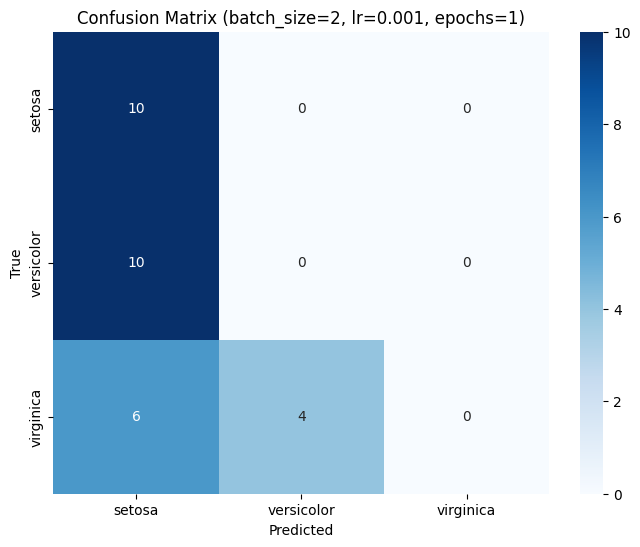

Testing complete.

Training with batch_size=2, lr=0.001, epochs=3

Manual Hyperparameters:
num_epochs: 3
learning_rate: 0.001
batch_size: 2
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.8333333333333334
F1 Score: 0.8222222222222222


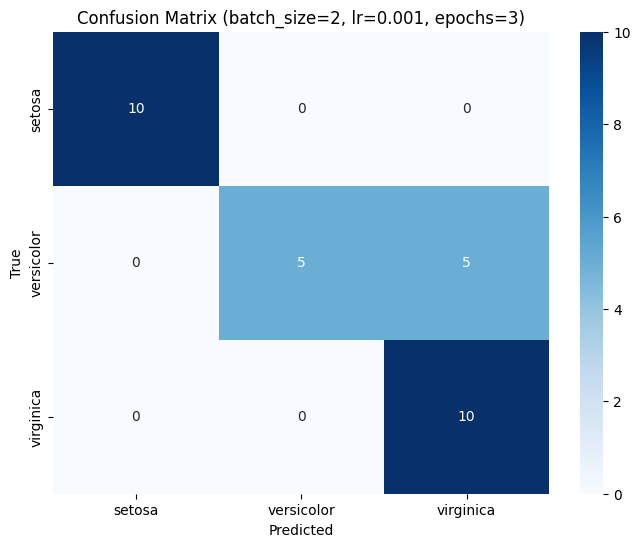

Testing complete.

Training with batch_size=2, lr=0.001, epochs=5

Manual Hyperparameters:
num_epochs: 5
learning_rate: 0.001
batch_size: 2
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.8
F1 Score: 0.7802197802197802


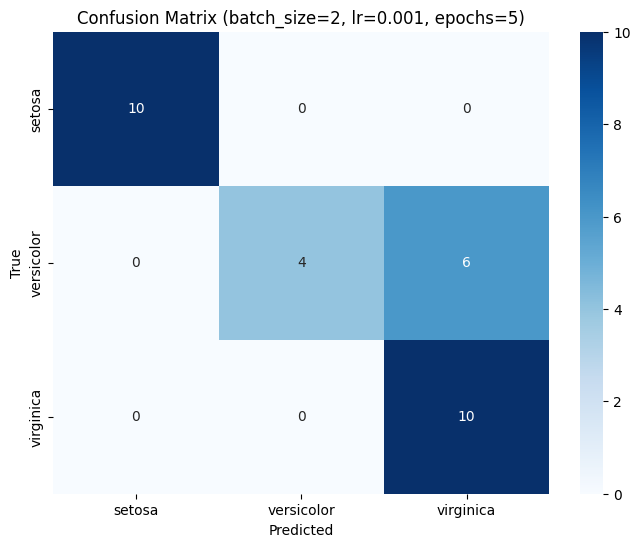

Testing complete.

Training with batch_size=2, lr=1e-05, epochs=1

Manual Hyperparameters:
num_epochs: 1
learning_rate: 1e-05
batch_size: 2
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


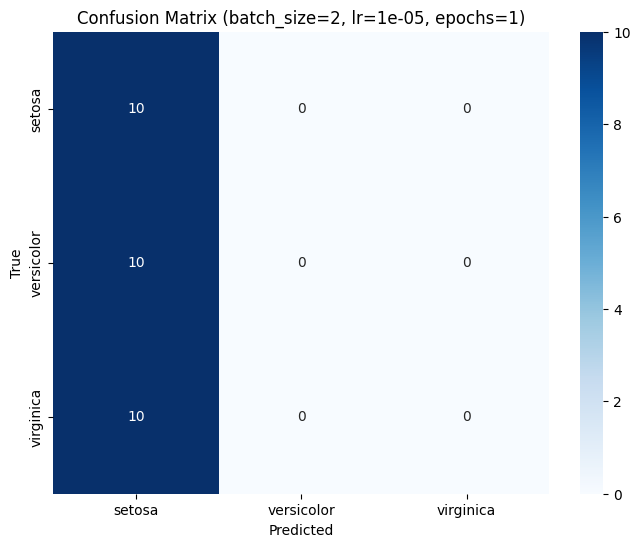

Testing complete.

Training with batch_size=2, lr=1e-05, epochs=3

Manual Hyperparameters:
num_epochs: 3
learning_rate: 1e-05
batch_size: 2
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


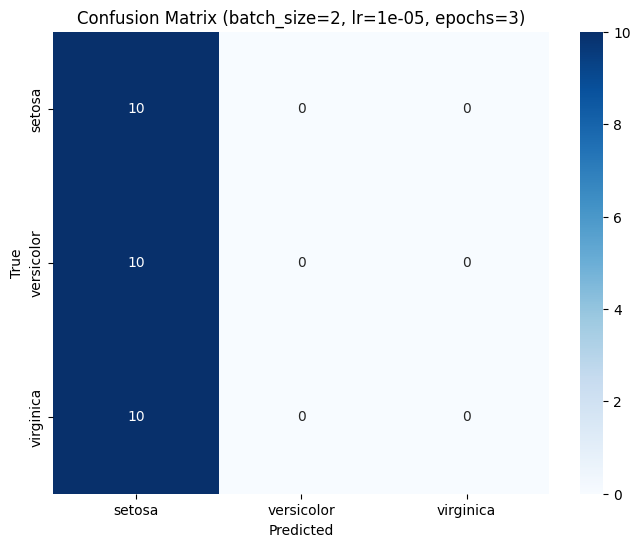

Testing complete.

Training with batch_size=2, lr=1e-05, epochs=5

Manual Hyperparameters:
num_epochs: 5
learning_rate: 1e-05
batch_size: 2
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


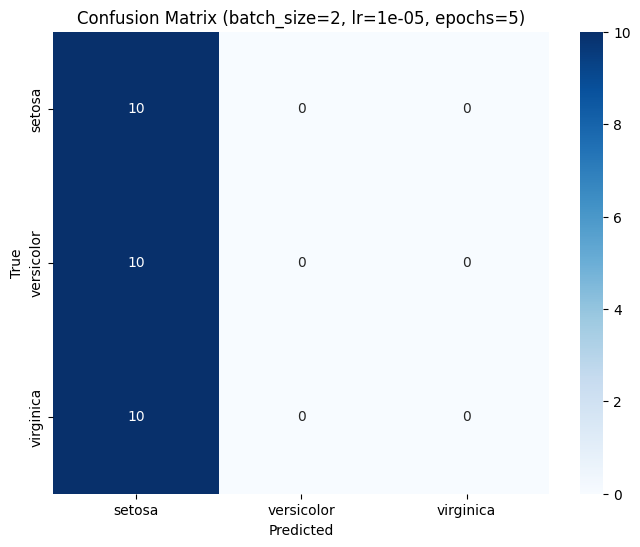

Testing complete.

Training with batch_size=4, lr=0.001, epochs=1

Manual Hyperparameters:
num_epochs: 1
learning_rate: 0.001
batch_size: 4
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


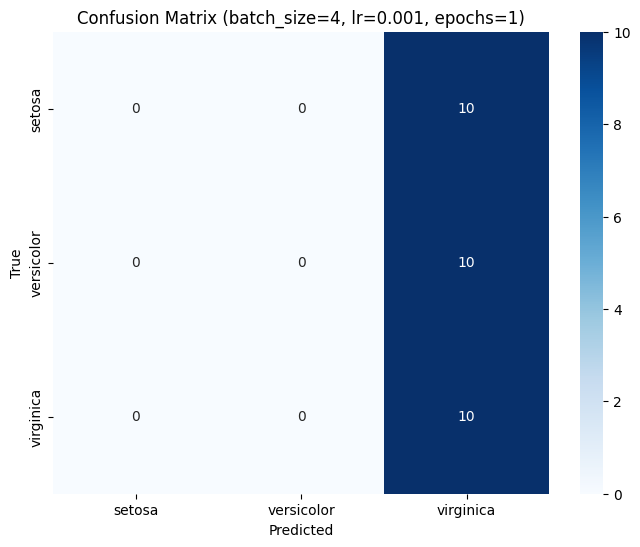

Testing complete.

Training with batch_size=4, lr=0.001, epochs=3

Manual Hyperparameters:
num_epochs: 3
learning_rate: 0.001
batch_size: 4
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.7666666666666667
F1 Score: 0.7340930674264008


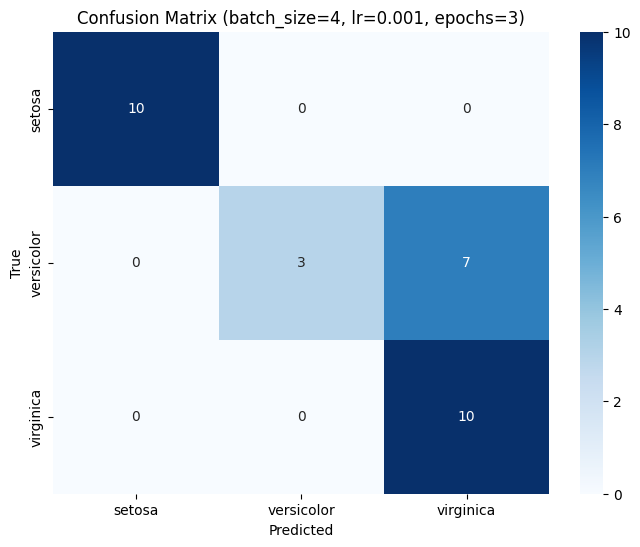

Testing complete.

Training with batch_size=4, lr=0.001, epochs=5

Manual Hyperparameters:
num_epochs: 5
learning_rate: 0.001
batch_size: 4
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.8333333333333334
F1 Score: 0.8294970161977834


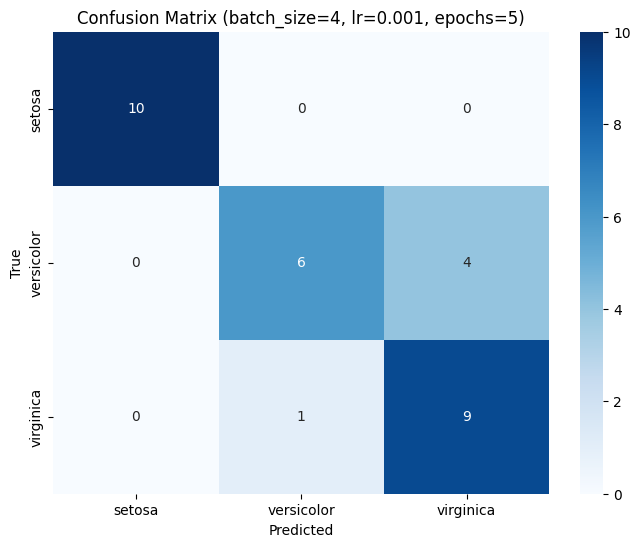

Testing complete.

Training with batch_size=4, lr=1e-05, epochs=1

Manual Hyperparameters:
num_epochs: 1
learning_rate: 1e-05
batch_size: 4
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


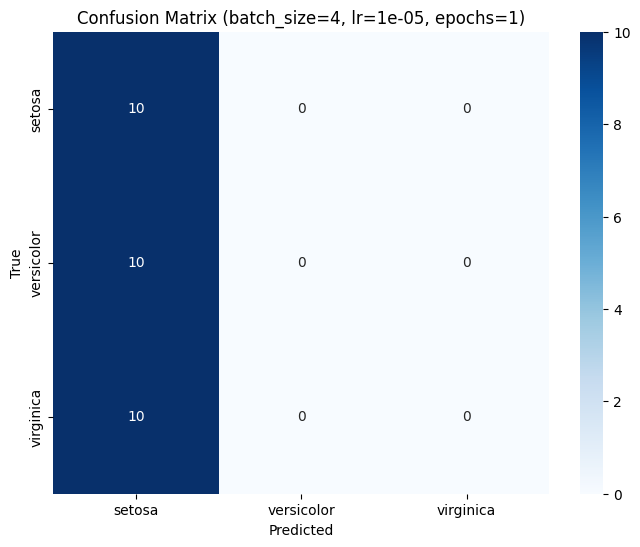

Testing complete.

Training with batch_size=4, lr=1e-05, epochs=3

Manual Hyperparameters:
num_epochs: 3
learning_rate: 1e-05
batch_size: 4
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


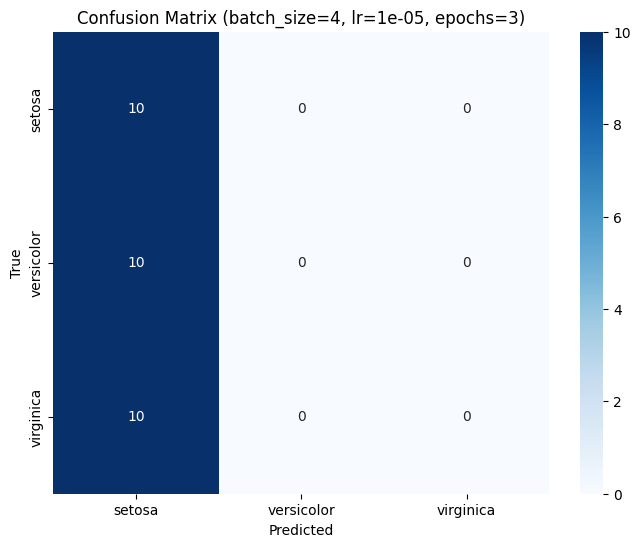

Testing complete.

Training with batch_size=4, lr=1e-05, epochs=5

Manual Hyperparameters:
num_epochs: 5
learning_rate: 1e-05
batch_size: 4
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


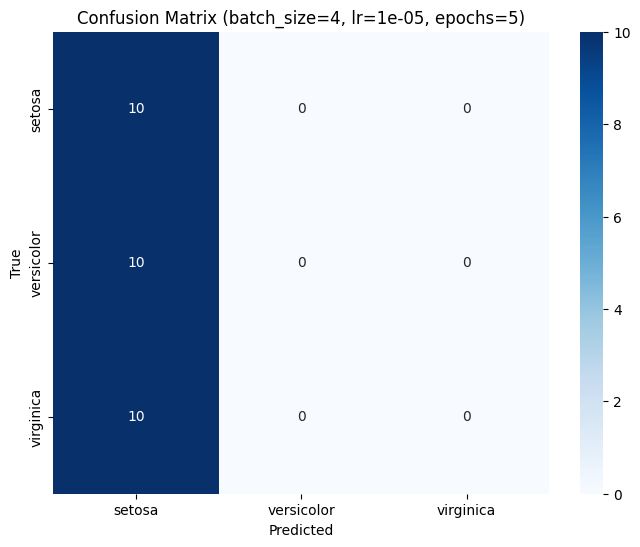

Testing complete.


In [19]:
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

acuracies = []
f1_scores = []
for batch_size in batch_sizes:
    for lr in learning_rates:
        for epoch in epochs:
            print(f"\nTraining with batch_size={batch_size}, lr={lr}, epochs={epoch}")
            predictor = train_manual_model(train_data, batch_size, lr, epoch)
            print("\nTraining complete.")

            # test the trained model by accruacy and f1 score using sklearn
            print("\nTesting the trained model...")
            y_pred = predictor.predict(test_data)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            print(f"Accuracy: {accuracy}")
            print(f"F1 Score: {f1}")
            acuracies.append(accuracy)
            f1_scores.append(f1)
            # plotting confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.title(f'Confusion Matrix (batch_size={batch_size}, lr={lr}, epochs={epoch})')
            plt.show()
            print("Testing complete.")




### Task 2: Automated Hyperparameter Search (20%)


In [25]:
def train_auto_model(train_data, batch_size, lr, epochs):
    """Train model with manual hyperparameters."""
    search_space = {
        'NN_TORCH': {
            'num_epochs': epochs,  # Different epoch values
            'learning_rate': lr,  # Various learning rates
            'batch_size': batch_size,  # Different batch sizes
            'hidden_size': 16,  # Number of neurons in hidden layers
        }
    }

    print("\nManual Hyperparameters:")
    for param, value in search_space['NN_TORCH'].items():
        print(f"{param}: {value}")

    predictor = TabularPredictor(
        verbosity=1,
        label='target',           # Column name of our target variable
        problem_type='multiclass',  # Multiclass classification
        eval_metric='accuracy',   # Metric to optimize
        path='models/manual_mlp'  # Where to save the model
    )

    search_strategy = 'random'

    print("\nStarting manual training...")
    predictor.fit(
        train_data,
        hyperparameter_tune_kwargs={ # HPO is not performed unless hyperparameter_tune_kwargs is specified
          'scheduler' : 'local',
          'searcher': search_strategy,
          'num_trials': 2,
        },
        hyperparameters=search_space,
        time_limit=600,                 # Maximum training time (10 minutes)
        presets='best_quality',
        ag_args_fit={'num_gpus': 1}

    )

    return predictor

In [ ]:
predictor = train_auto_model(train_data, batch_size, lr, epoch)


Manual Hyperparameters:
num_epochs: 5
learning_rate: 1e-05
batch_size: 4
hidden_size: 16

Starting manual training...
